First moment maps, velocity anisotropy, 

print image every so often, 



In [1]:
import glob
import os
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import scipy.stats
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (7, 7);

Populating the interactive namespace from numpy and matplotlib


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [ ]:
# first, the simulated data

infiles = glob.glob('datacubes/*')

# look at their headers
'''
for file in infiles:
    print(file)
    hdu_list = fits.open(file)
    print(hdu_list.info())
    print(hdu_list[0].header)
    print('*'*468)
    break
'''

for file in infiles: 
    print(file)
    hdu_list = fits.open(file)
    print(hdu_list.info())
    vmin = hdu_list[0].header['CRVAL3']
    v_step = hdu_list[0].header['CDELT3']
    cube = hdu_list[0].data
    hdu_list.close()
    
    print("v_step: ",v_step)
    
    # first moment map
    print("finding the integrated map as the sum over the 0th and dividing by the # in the 0th of ", np.shape(cube))
    
    integrated_map = np.mean(cube, axis=0)#np.sum(cube,0)/np.shape(cube)[0]
    
        # Plotting
    fig = plt.figure()
    ax111 = fig.add_subplot(111)
    L1 = ax111.contourf(integrated_map,30, interpolation='nearest')
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s?', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Integrated Map for {0}".format(file))
    plt.show()


    # second moment map 
    print("finding a temp cube where the 0th is now the 0th plus vk times the 0th for ", np.shape(cube), "\n", "vk = vmin + v_step*i")
    
    temp_cube = []
    for i in range(0,np.shape(cube)[0]):
        channel = cube[i,:,:]
        vk = vmin + v_step*i
        temp_cube.append(channel + vk*channel)
        if(i%10 ==0):
            print("-"*10, "some loop info", "-"*10)
            print("temp cube shape", np.shape(temp_cube))
            print("channel shape: ",np.shape(channel))
            print("vmin:", vmin, "v_step: ", v_step, "i: ", i, "vk: ",vk)
            print(channel[0][0], "just became", channel[0][0]*vk, "and so on")
        
    #check indexing:
    print("\n","original cube: ",np.shape(cube), '\n',"temp cube: ",np.shape(temp_cube), '\n',"integrated map: ",np.shape(integrated_map))
    
    # second moment map 
    print("\n","finding the velocity centroid map as the sum of the 0th of ", np.shape(temp_cube), " and dividing by the integrated map")
    velocity_centroid_map = np.sum(temp_cube,0)/integrated_map
    
    #check indexing:
    print("\n","original cube: ",np.shape(cube), '\n',"temp cube: ",np.shape(temp_cube), '\n',"integrated map: ", np.shape(integrated_map), '\n',"velocity centroid map: ", np.shape(velocity_centroid_map))
    
    # Plotting
    fig = plt.figure()
    ax111 = fig.add_subplot(111)
    L1 = ax111.contourf(velocity_centroid_map,30, interpolation='nearest')
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s?', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Velocity Centroid for {0}".format(file))
    plt.show()



In [ ]:
# next, the observed data

infiles = ['taurus_12co_cleaned.fits']#, 'taurus_13co_cleaned.fits']

# look at their headers
'''
for file in infiles:
    print(file)
    hdu_list = fits.open(file)
    print(hdu_list.info())
    print(hdu_list[0].header)
    print('*'*468)
    break
'''



for file in infiles: 
    print(file)
    hdu_list = fits.open(file)
    print(hdu_list.info())
    vmin = hdu_list[0].header['CRVAL1']
    v_step = hdu_list[0].header['CRVAL2']
    cube = hdu_list[0].data
    hdu_list.close()
    
    print("v_step: ",v_step)
    
    # first moment map
    print("finding the integrated map as the sum over the 2nd and dividing by the # in the 2nd of ", np.shape(cube))
    
    integrated_map = np.mean(cube, axis=2)#np.sum(cube,2)/np.shape(cube)[2]
    
    # Plotting
    fig = plt.figure()
    ax111 = fig.add_subplot(111)
    L1 = ax111.contourf(integrated_map,30, interpolation='nearest')
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s?', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Integrated Map for {0}".format(file))
    plt.show()

    # second moment map 
    print("finding a temp cube where the 0th is now the 2nd plus vk times the 2nd for ", np.shape(cube),"\n", "vk = vmin + v_step*i")
    
    temp_cube = []
    for i in range(0,np.shape(cube)[2]):
        channel = cube[:,:,i]
        vk = vmin + v_step*i
        temp_cube.append(channel + vk*channel)
        if(i%50 ==0):
            print("-"*10, "some loop info", "-"*10)
            print("temp cube shape", np.shape(temp_cube))
            print("channel shape: ",np.shape(channel))
            print("vmin:", vmin, "v_step: ", v_step, "i: ", i, "vk: ",vk)
            print(channel[0][0], "just became", channel[0][0]*vk, "and so on")
        
        
    #check indexing:
    print("\n","original cube: ",np.shape(cube), '\n',"temp cube: ",np.shape(temp_cube), '\n',"integrated map: ",np.shape(integrated_map))
    
    # second moment map 
    print("\n","finding the velocity centroid map as the sum of the 0th of ", np.shape(temp_cube), " and dividing by the integrated map")
    velocity_centroid_map = np.sum(temp_cube,0)/integrated_map
    #check indexing:
    print("\n","original cube: ",np.shape(cube), '\n',"temp cube: ",np.shape(temp_cube), '\n',"integrated map: ", np.shape(integrated_map), '\n',"velocity centroid map: ", np.shape(velocity_centroid_map))
    
    # Plotting
    fig = plt.figure()
    ax111 = fig.add_subplot(111)
    L1 = ax111.contourf(velocity_centroid_map,30, interpolation='nearest')
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s?', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Velocity Centroid for {0}".format(file))
    plt.show()



In [ ]:
# Let's try finding the moments using scipy stats

import scipy.stats

infiles = glob.glob('datacubes/*')

for file in infiles:
    print(file)
    hdu_list = fits.open(file)
    vmin = hdu_list[0].header['CRVAL1']
    v_step = hdu_list[0].header['CRVAL2']
    cube = hdu_list[0].data
    hdu_list.close()
    print(np.shape(cube))
    first_map = scipy.stats.moment(cube,moment=0, axis=0)
    second_map = scipy.stats.moment(cube,moment=1, axis=0)
    
    
    fig = plt.figure()
    ax111 = fig.add_subplot(111)
    L1 = ax111.contourf(first_map,30, interpolation='nearest')
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s?', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("First moment Map for {0}".format(file))
    plt.show()
    fig = plt.figure()
    ax111 = fig.add_subplot(111)
    L1 = ax111.contourf(second_map,30, interpolation='nearest')
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s?', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Second Map for {0}".format(file))
    plt.show()
    


In [ ]:
infiles = ['taurus_12co_cleaned.fits', 'taurus_13co_cleaned.fits']

for file in infiles:
    print(file)
    hdu_list = fits.open(file)
    vmin = hdu_list[0].header['CRVAL1']
    v_step = hdu_list[0].header['CRVAL2']
    cube = hdu_list[0].data
    hdu_list.close()
    print(np.shape(cube))
    first_map = scipy.stats.moment(cube,moment=0, axis=2)
    second_map = scipy.stats.moment(cube,moment=1, axis=2)
    
    
    fig = plt.figure()
    ax111 = fig.add_subplot(111)
    L1 = ax111.contourf(first_map,30, interpolation='nearest')
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s?', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("First moment Map for {0}".format(file))
    plt.show()
    fig = plt.figure()
    ax111 = fig.add_subplot(111)
    L1 = ax111.contourf(second_map,30, interpolation='nearest')
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s?', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Second Map for {0}".format(file))
    plt.show()
    


datacubes/ab-5_J2-1.fits
(31, 512, 512)
vmin: 

 -0.75 
 vmax:  0.75
INFO

INFO:astropy:Auto-setting vmin to  1.557e+00
INFO:astropy:Auto-setting vmax to  4.316e+00


: Auto-setting vmin to  1.557e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.316e+00 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -2.103e-01
INFO:astropy:Auto-setting vmax to  1.982e-01


: Auto-setting vmin to -2.103e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.982e-01 [aplpy.core]
datacubes/ab-8_J2-1.fits


(31, 512, 512)
vmin: 

 -0.75 
 vmax:  0.75
INFO

INFO:astropy:Auto-setting vmin to -2.958e-02
INFO:astropy:Auto-setting vmax to  3.597e-01


: Auto-setting vmin to -2.958e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.597e-01 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -2.321e-01
INFO:astropy:Auto-setting vmax to  2.191e-01


: Auto-setting vmin to -2.321e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.191e-01 [aplpy.core]
datacubes/dn275_J2-1.fits


(31, 512, 512)
vmin: 

 -0.75 
 vmax:  0.75
INFO

INFO:astropy:Auto-setting vmin to  1.680e-01
INFO:astropy:Auto-setting vmax to  1.855e+00


: Auto-setting vmin to  1.680e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.855e+00 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -2.230e-01
INFO:astropy:Auto-setting vmax to  2.017e-01


: Auto-setting vmin to -2.230e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.017e-01 [aplpy.core]
datacubes/dn8000_J2-1.fits


(31, 512, 512)
vmin: 

 -0.75 
 vmax:  0.75
INFO

INFO:astropy:Auto-setting vmin to  1.805e+00
INFO:astropy:Auto-setting vmax to  4.697e+00


: Auto-setting vmin to  1.805e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.697e+00 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -2.066e-01
INFO:astropy:Auto-setting vmax to  1.970e-01


: Auto-setting vmin to -2.066e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.970e-01 [aplpy.core]
datacubes/dn9_J2-1.fits


(31, 512, 512)
vmin: 

 -0.75 
 vmax:  0.75
INFO

INFO:astropy:Auto-setting vmin to -4.268e-03
INFO:astropy:Auto-setting vmax to  4.858e-02


: Auto-setting vmin to -4.268e-03 [aplpy.core]
INFO: Auto-setting vmax to  4.858e-02 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -2.362e-01
INFO:astropy:Auto-setting vmax to  2.234e-01


: Auto-setting vmin to -2.362e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.234e-01 [aplpy.core]


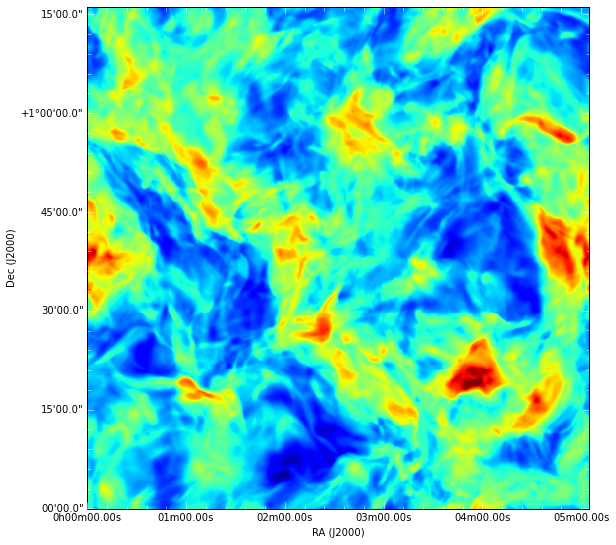

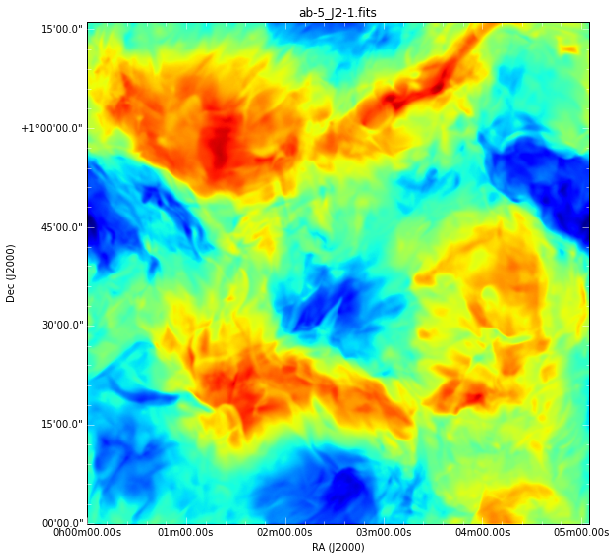

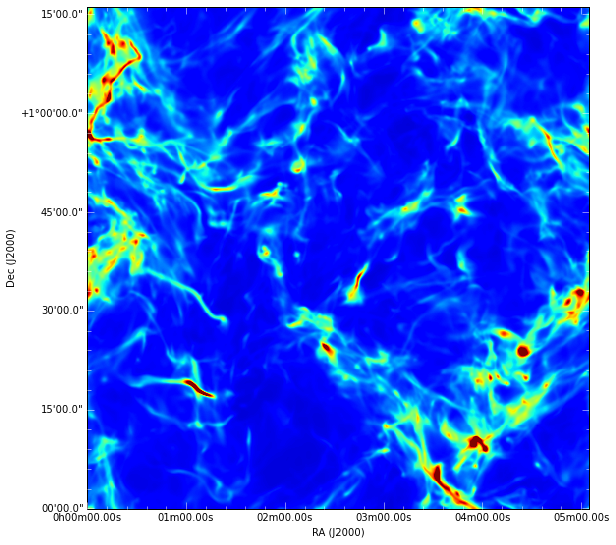

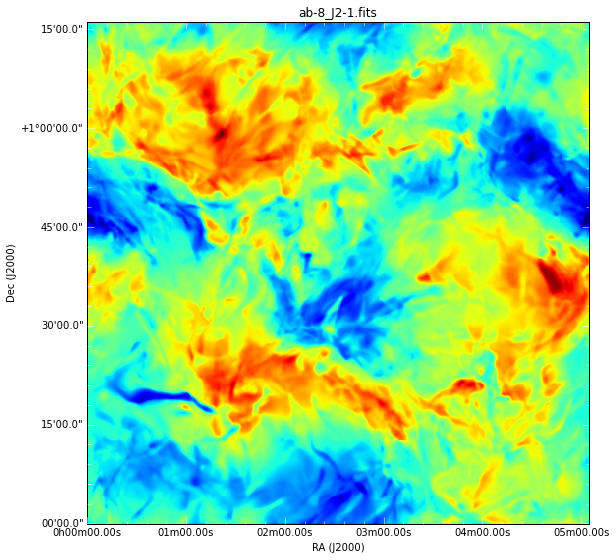

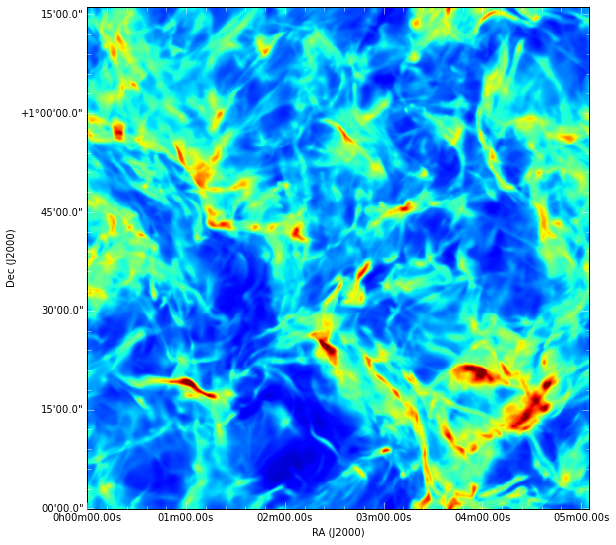

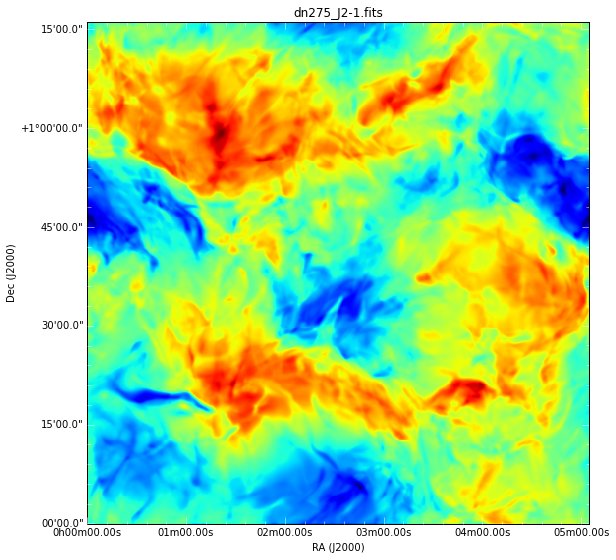

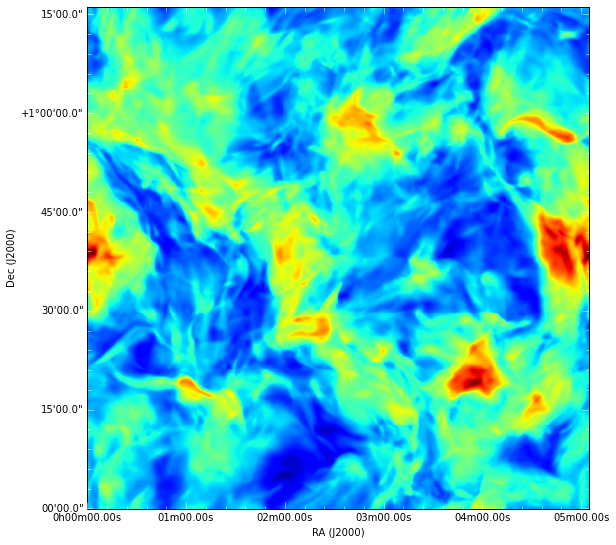

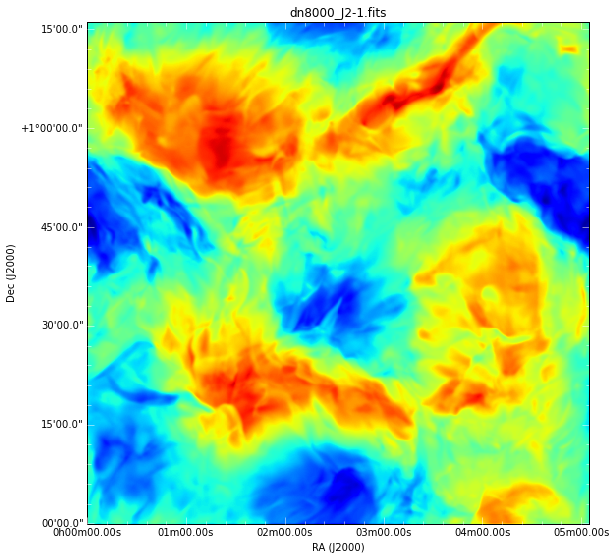

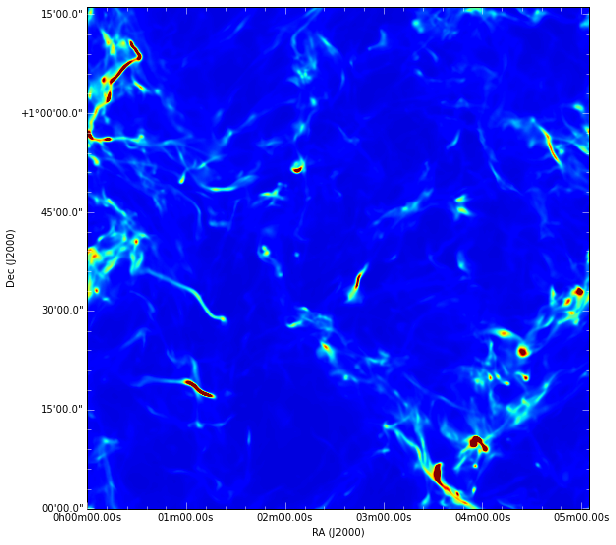

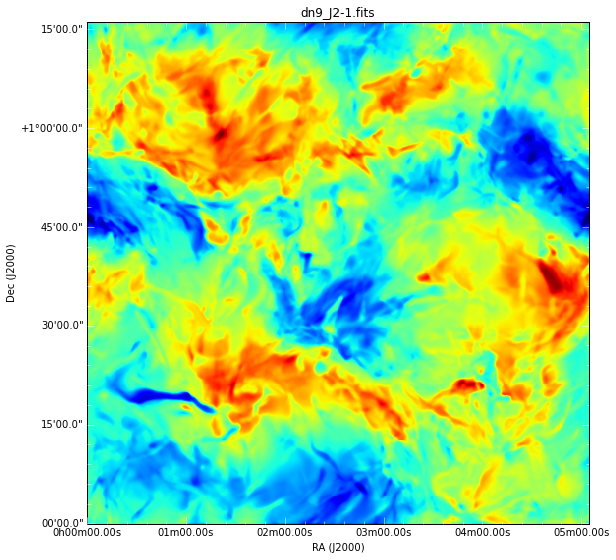

In [28]:
# let's try using Spectral Cube

import astropy.units as u
from spectral_cube import SpectralCube
import warnings
import aplpy  
warnings.filterwarnings('ignore')

# first, the simulated data

infiles = glob.glob('datacubes/*')


for file in infiles: 
    print(file)
    cube = SpectralCube.read(file)
    SpectralCube
    print(np.shape(cube))  
    velo, dec, ra = cube.world[:]
    
    #double check this it is using correct vmin/vmax
    vmin =(np.min(velo)).value
    vmax =(np.max(velo)).value
    print("vmin: ", vmin, "\n vmax: ",vmax)
    
    # extract the subcube between 98 and 100 GHz
    #slab = cube.spectral_slab(98 * u.GHz, 100 * u.GHz)  

    # Ignore elements fainter than 1K
    #masked_slab = slab.with_mask(slab > 1)  

    # Compute the first moment and write to file
    m0 = cube.moment(order=0, axis=0)
    # take min of moment to set colorbar
    f = aplpy.FITSFigure(m0.hdu)  
    f.show_colorscale()  
    m1 = cube.moment(order=1, axis=0)    
    g = aplpy.FITSFigure(m1.hdu)  
    g.show_colorscale()
    g.set_title(file[10:], fontsize="large")
    completeName = os.path.abspath('moment1/moment1_{0}'.format(file[10:]))
    m1.write(completeName, overwrite=True) 
    g.save('moment_{0}.png'.format(filename))
    
    
# Next, make plots
# for the comparisions, just make a big image of each with good titles and axis. You'll cut and paste them on the powerpoint

# remake contour plots in IDL now that code works

# understand effects of radiative transfer on isotropy
# compare radiatve transfer ( i have) with particular density and abundance with non radiative transfer (blakesley will send) 
# take first moment map, run through sf in idl, take ouput array, contour plot in python (2)

# isn't getting correct vmin/vmax, specify those and tell it which axis is the velocity; look


taurus_12co_cleaned.fits
(151, 1529, 2069)
INFO

INFO:astropy:Auto-setting vmin to -6.852e+03
INFO:astropy:Auto-setting vmax to  2.936e+04


: Auto-setting vmin to -6.852e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.936e+04 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -1.629e+05
INFO:astropy:Auto-setting vmax to  1.812e+05


: Auto-setting vmin to -1.629e+05 [aplpy.core]
INFO: Auto-setting vmax to  1.812e+05 [aplpy.core]
taurus_13co_cleaned.fits
(151, 1529, 2069)
INFO

INFO:astropy:Auto-setting vmin to -2.914e+03
INFO:astropy:Auto-setting vmax to  1.008e+04


: Auto-setting vmin to -2.914e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.008e+04 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -3.553e+05
INFO:astropy:Auto-setting vmax to  3.737e+05


: Auto-setting vmin to -3.553e+05 [aplpy.core]
INFO: Auto-setting vmax to  3.737e+05 [aplpy.core]


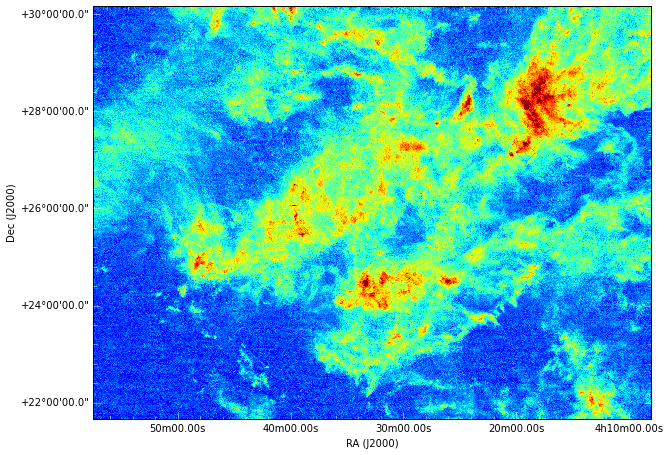

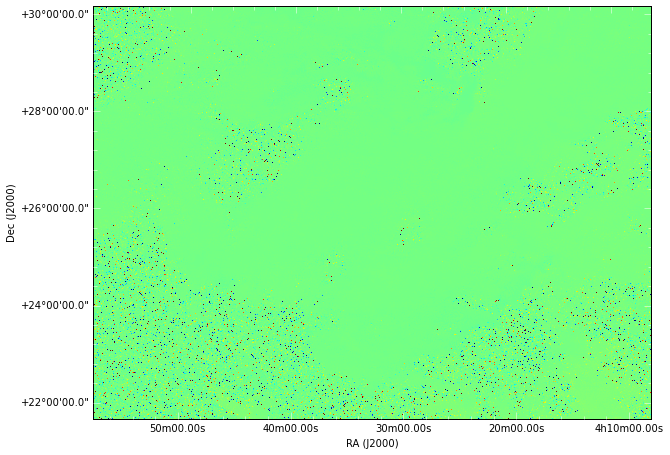

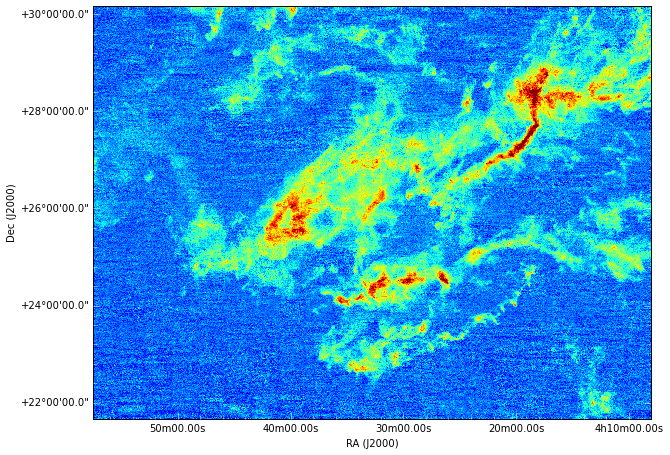

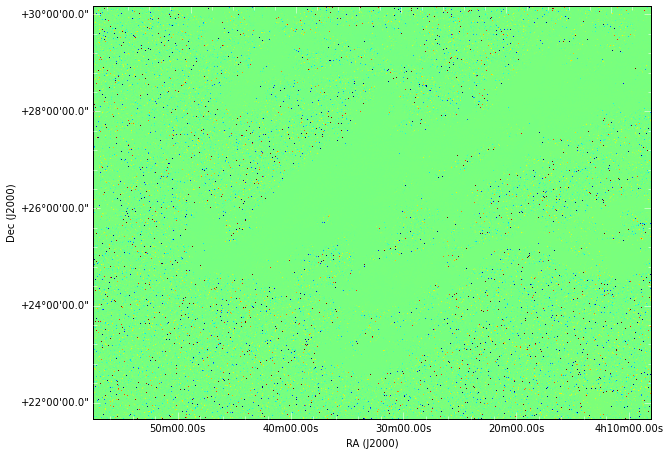

In [5]:
infiles = ['taurus_12co_cleaned.fits', 'taurus_13co_cleaned.fits']

for file in infiles: 
    # check if its units
    print(file)
    cube = SpectralCube.read(file)  
    print(np.shape(cube))  

    # extract the subcube between 98 and 100 GHz
    #slab = cube.spectral_slab(98 * u.GHz, 100 * u.GHz)  

    # Ignore elements fainter than 1K
    #masked_slab = slab.with_mask(slab > 1)  

    # Compute the first moment and write to file
    m0 = cube.moment(order=0)
    f = aplpy.FITSFigure(m0.hdu)  
    f.show_colorscale()  
    m1 = cube.moment(order=1)    
    g = aplpy.FITSFigure(m1.hdu)  
    g.show_colorscale()

    #m1.write('~velocity_anisotropy/moment1/moment1_{0}'.format(file)) 
    #f.save('moment_0.png') 


In [97]:
cube = SpectralCube.read(infiles[0])  
print(np.shape(cube))  
velo, dec, ra = cube.world[:]
vmin =(np.min(velo))

(31, 512, 512)


['b.1p.1_centroid.fits', 'b.1p1_centroid.fits', 'b1p.01_centroid.fits', 'b1p.1_centroid.fits', 'b1p1_centroid.fits']
b.1p.1_centroid.fits
b.1p.1_centroid
INFO

INFO:astropy:Auto-setting vmin to -7.734e-01
INFO:astropy:Auto-setting vmax to  8.723e-01


: Auto-setting vmin to -7.734e-01 [aplpy.core]
INFO: Auto-setting vmax to  8.723e-01 [aplpy.core]
b.1p1_centroid.fits


b.1p1_centroid
INFO

INFO:astropy:Auto-setting vmin to -4.979e-01
INFO:astropy:Auto-setting vmax to  5.036e-01


: Auto-setting vmin to -4.979e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.036e-01 [aplpy.core]
b1p.01_centroid.fits


b1p.01_centroid
INFO

INFO:astropy:Auto-setting vmin to -4.747e-01
INFO:astropy:Auto-setting vmax to  6.833e-01


: Auto-setting vmin to -4.747e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.833e-01 [aplpy.core]
b1p.1_centroid.fits


b1p.1_centroid
INFO

INFO:astropy:Auto-setting vmin to -5.327e-01
INFO:astropy:Auto-setting vmax to  6.254e-01


: Auto-setting vmin to -5.327e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.254e-01 [aplpy.core]
b1p1_centroid.fits


b1p1_centroid
INFO

INFO:astropy:Auto-setting vmin to -4.731e-01
INFO:astropy:Auto-setting vmax to  5.751e-01


: Auto-setting vmin to -4.731e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.751e-01 [aplpy.core]


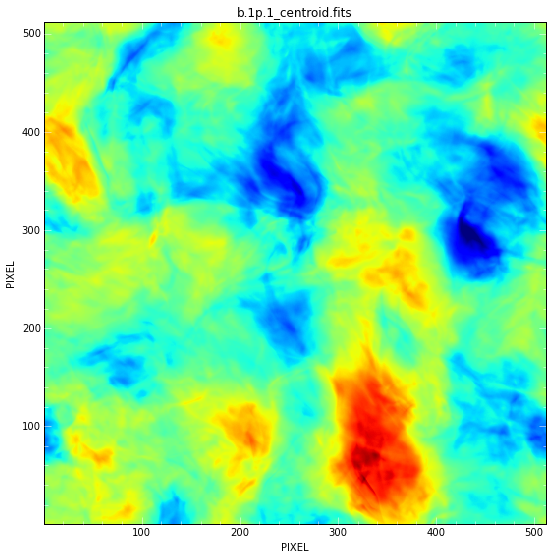

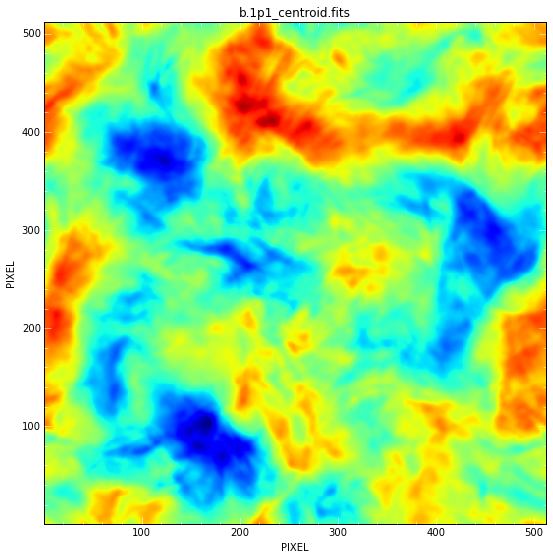

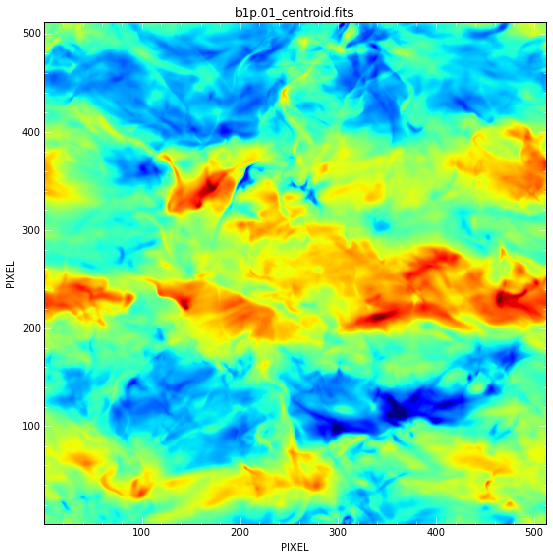

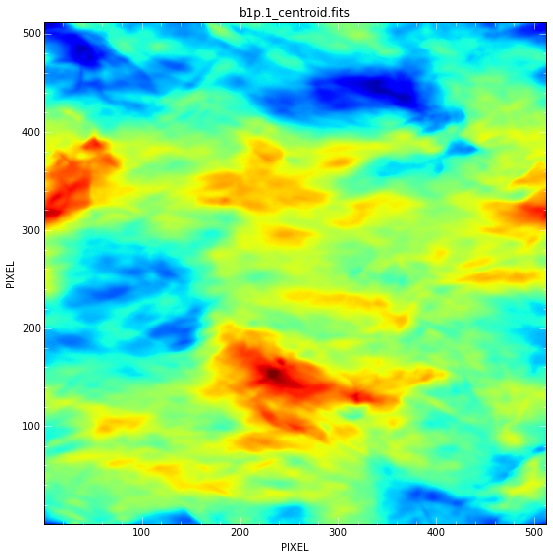

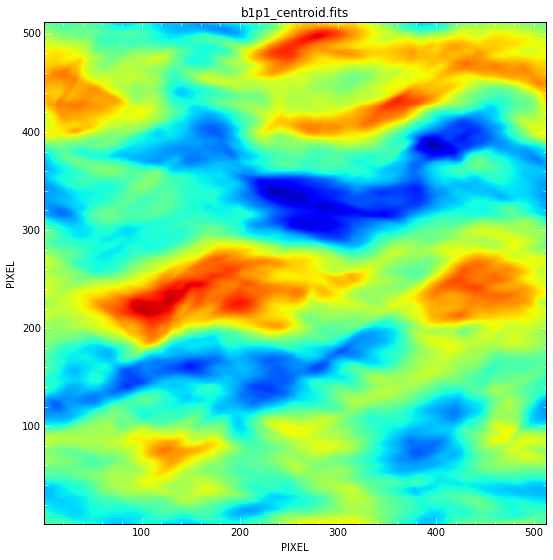

In [38]:
infiles = glob.glob('*cent*.fits')
print(infiles)
for file in infiles: 
    print(file)
    filename = file[:file.find(".fits")]
    print(filename)
    g = aplpy.FITSFigure(file)  
    g.show_colorscale()
    g.set_title(file, fontsize="large")
    completeName = os.path.abspath('/Users/mmcintosh/velocity_anisotropy/figures/{0}'.format(filename))
    m1.write(completeName+'.fits', overwrite=True) 
    g.save(completeName+'.png'.format(filename))

In [34]:
# let's try using Spectral Cube

import astropy.units as u
from spectral_cube import SpectralCube
import warnings
import aplpy  
warnings.filterwarnings('ignore')

# first, the simulated data

infiles1 = glob.glob('missy_sims/b.1p.01/data/*')
infiles2 = glob.glob('missy_sims/b1p.01/data/*')
infiles = infiles1 + infiles2
print(infiles)



['b.1p.1_centroid.fits', 'b.1p1_centroid.fits', 'b1p.01_centroid.fits', 'b1p.1_centroid.fits', 'b1p1_centroid.fits']


In [35]:
for file in infiles: 
    print(file)
    filename1 = file[11:file.find("/data/")]
    filename2 = file[(file.find("data/")+5):file.find("_J2")]
    filename = filename1+"_"+filename2
    cube = SpectralCube.read(file)
    SpectralCube
    print(np.shape(cube))  
    velo, dec, ra = cube.world[:] 

    # Compute the first moment and write to file
    m0 = cube.moment(order=0, axis=0)
    # take min of moment to set colorbar
    f = aplpy.FITSFigure(m0.hdu)  
    f.show_colorscale()  
    m1 = cube.moment(order=1, axis=0)    
    g = aplpy.FITSFigure(m1.hdu)  
    g.show_colorscale()
    g.set_title(file[10:], fontsize="large")
    completeName = os.path.abspath('/Users/mmcintosh/velocity_anisotropy/figures/{0}'.format(filename))
    m1.write(completeName+".fits", overwrite=True) 
    g.save(completeName+'.png'.format(filename))
    
    
# Next, make plots
# for the comparisions, just make a big image of each with good titles and axis. You'll cut and paste them on the powerpoint

# remake contour plots in IDL now that code works

# understand effects of radiative transfer on isotropy
# compare radiatve transfer ( i have) with particular density and abundance with non radiative transfer (blakesley will send) 
# take first moment map, run through sf in idl, take ouput array, contour plot in python (2)

# isn't getting correct vmin/vmax, specify those and tell it which axis is the velocity; look


b.1p.1_centroid.fits


Exception: Data should be 3- or 4-dimensional

In [101]:
# Plot the centroid maps


# first, the simulated data

infiles1 = glob.glob('missy_sims/b.1p.01/con*.fits')
infiles2 = glob.glob('missy_sims/b.1p.1/con*.fits')
infiles3 = glob.glob('missy_sims/b.1p1/con*.fits')
infiles4 = glob.glob('missy_sims/b1p.01/con*.fits')
infiles5 = glob.glob('missy_sims/b1p.1/con*.fits')
infiles6 = glob.glob('missy_sims/b1p1/con*.fits')

infiles = infiles1 + infiles2 + infiles3 + infiles4 + infiles5 + infiles6 
print(infiles)

['missy_sims/b.1p.01/contour_ab-5_J2-1.fits', 'missy_sims/b.1p.01/contour_ab-8_J2-1.fits', 'missy_sims/b.1p.01/contour_dn275_J2-1.fits', 'missy_sims/b.1p.01/contour_dn8000_J2-1.fits', 'missy_sims/b.1p.01/contour_dn9_J2-1.fits', 'missy_sims/b.1p.1/contour_ab-5_J2-1.fits', 'missy_sims/b.1p.1/contour_ab-8_J2-1.fits', 'missy_sims/b.1p.1/contour_dn275_J2-1.fits', 'missy_sims/b.1p.1/contour_dn8000_J2-1.fits', 'missy_sims/b.1p.1/contour_dn9_J2-1.fits', 'missy_sims/b.1p1/contour_ab-5_J2-1.fits', 'missy_sims/b.1p1/contour_ab-8_J2-1.fits', 'missy_sims/b.1p1/contour_dn275_J2-1.fits', 'missy_sims/b.1p1/contour_dn8000_J2-1.fits', 'missy_sims/b.1p1/contour_dn9_J2-1.fits', 'missy_sims/b1p.01/contour_ab-5_J2-1.fits', 'missy_sims/b1p.01/contour_ab-8_J2-1.fits', 'missy_sims/b1p.01/contour_dn275_J2-1.fits', 'missy_sims/b1p.01/contour_dn8000_J2-1.fits', 'missy_sims/b1p.01/contour_dn9_J2-1.fits', 'missy_sims/b1p.1/contour_ab-5_J2-1.fits', 'missy_sims/b1p.1/contour_ab-8_J2-1.fits', 'missy_sims/b1p.1/contour

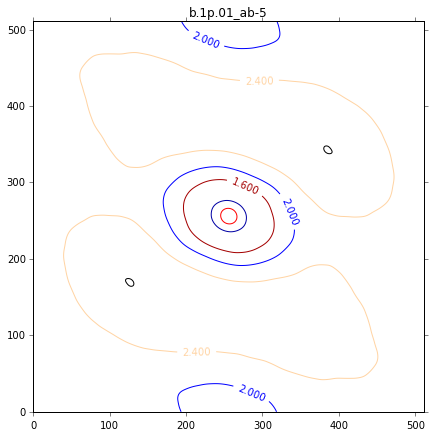

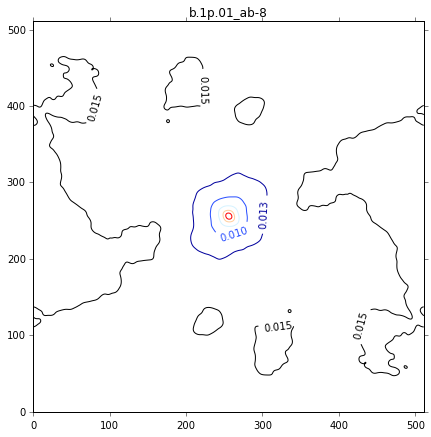

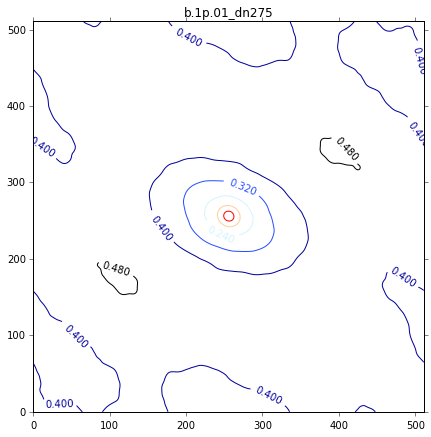

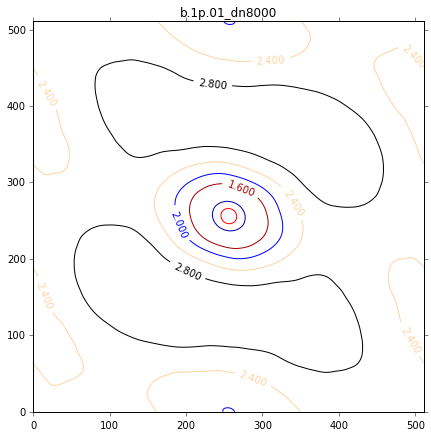

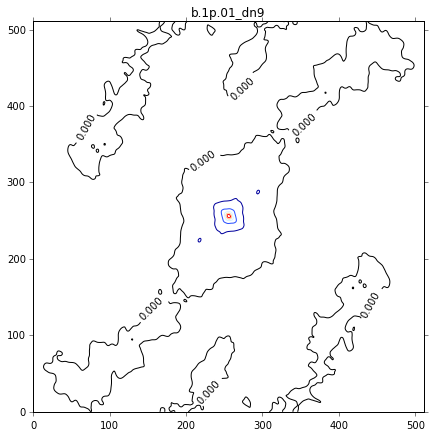

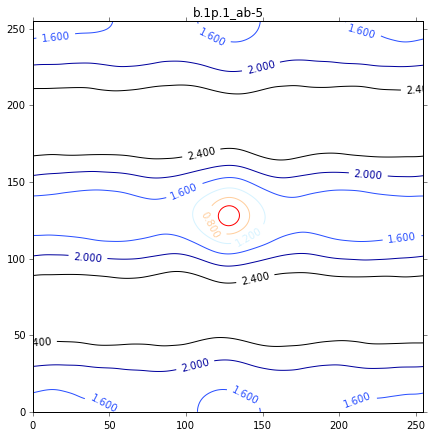

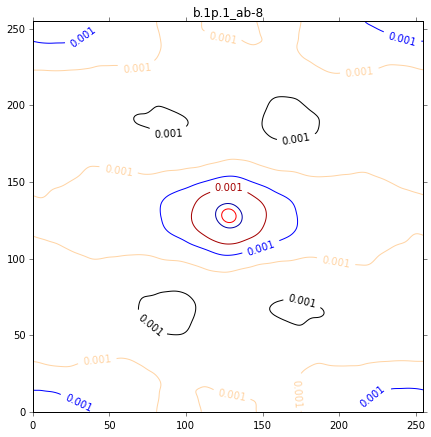

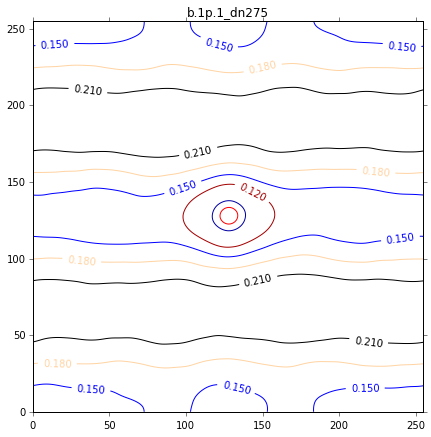

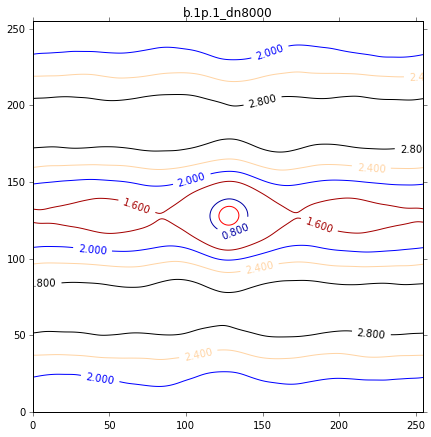

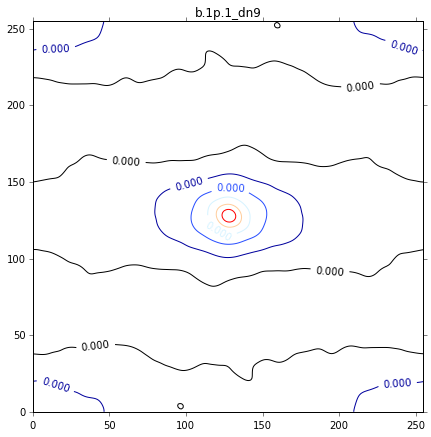

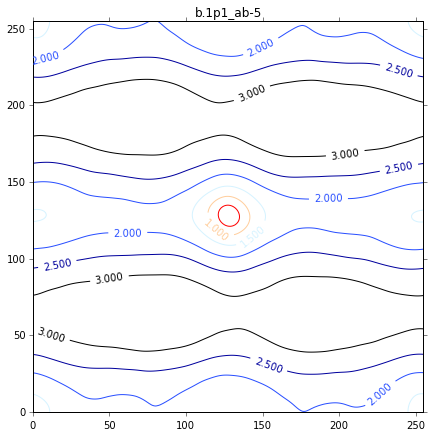

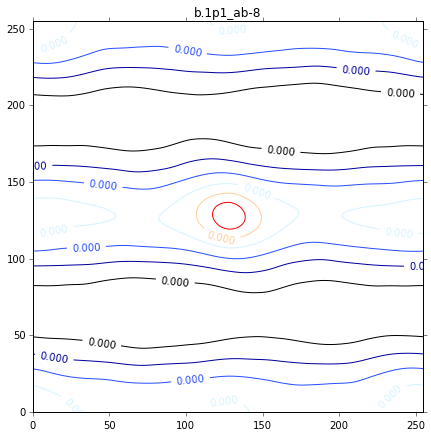

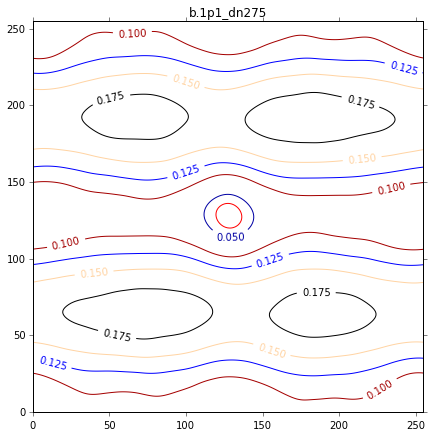

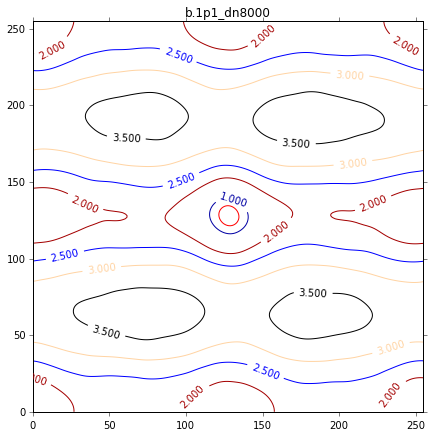

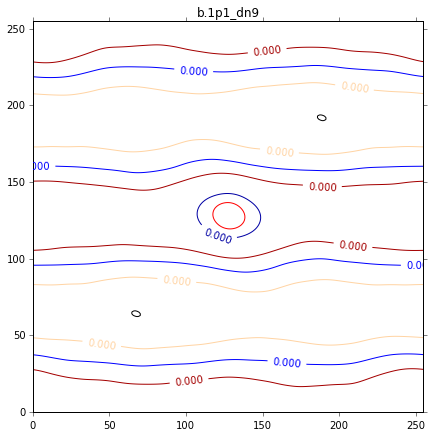

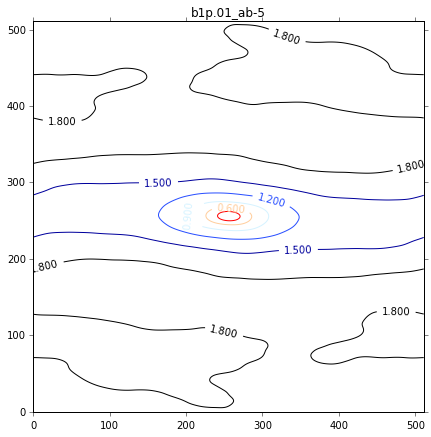

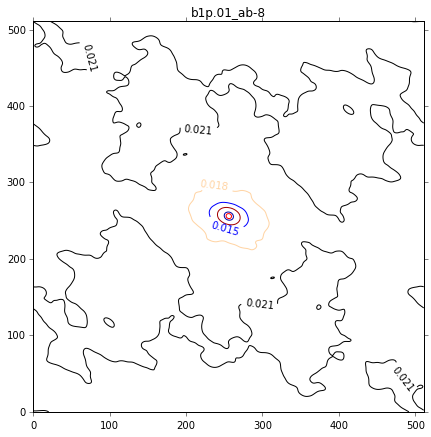

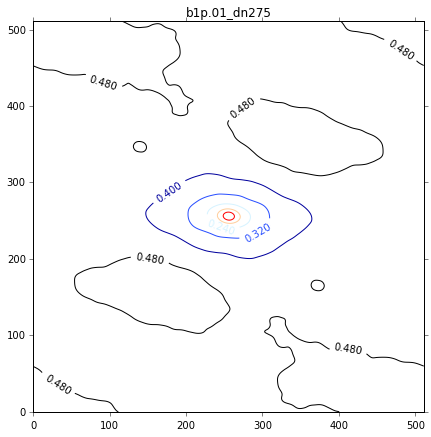

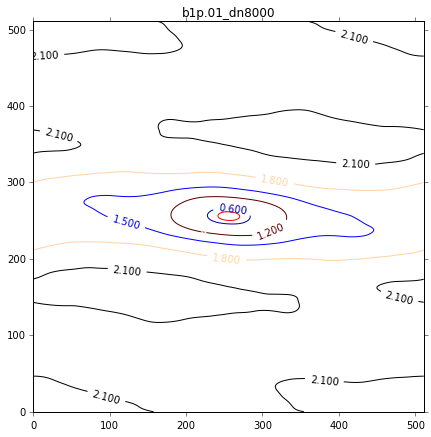

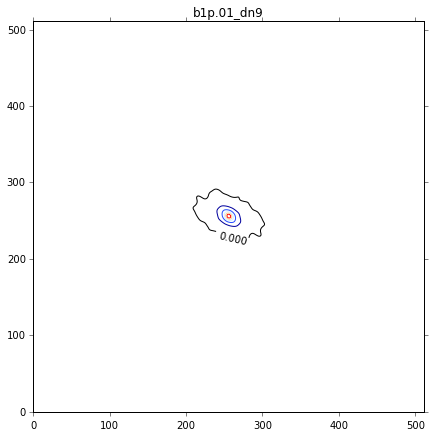

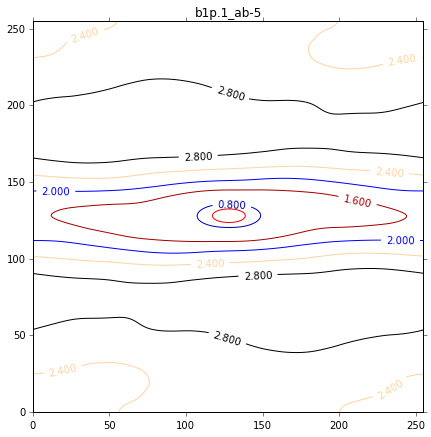

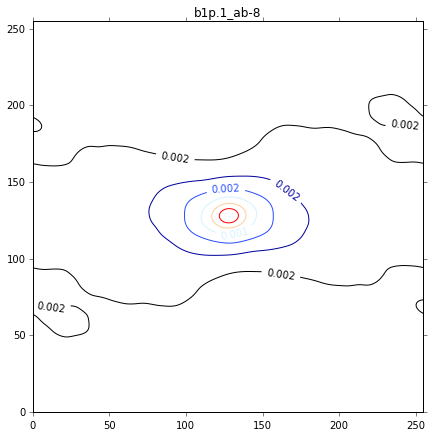

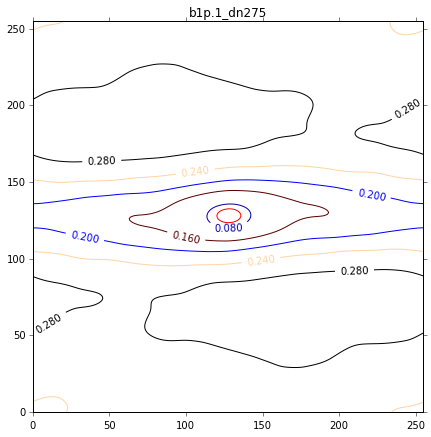

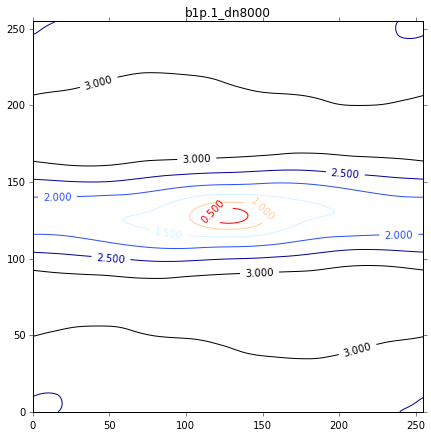

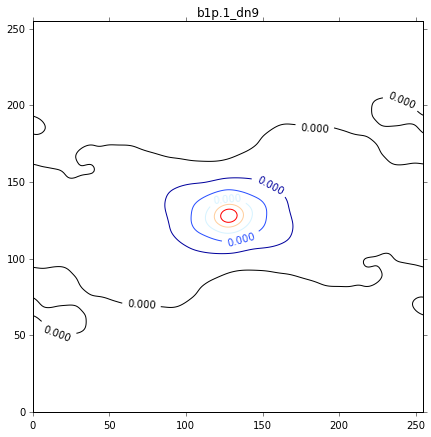

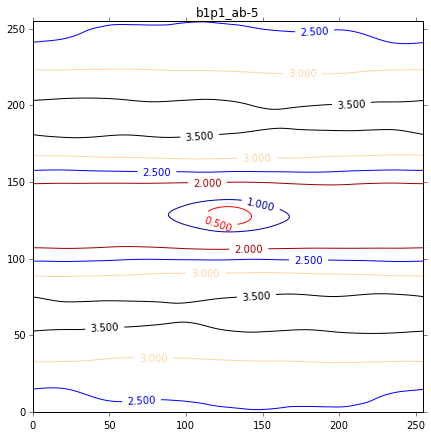

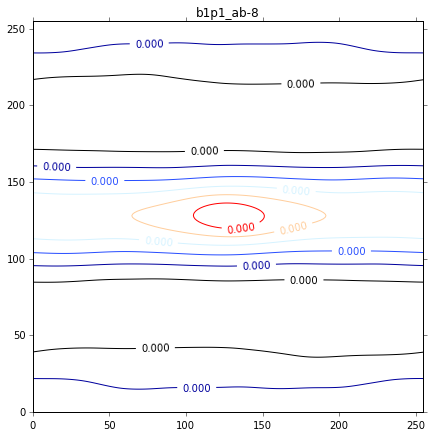

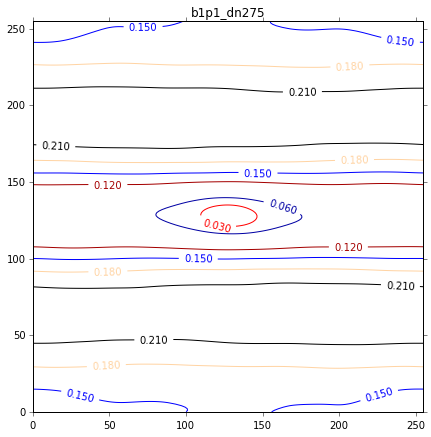

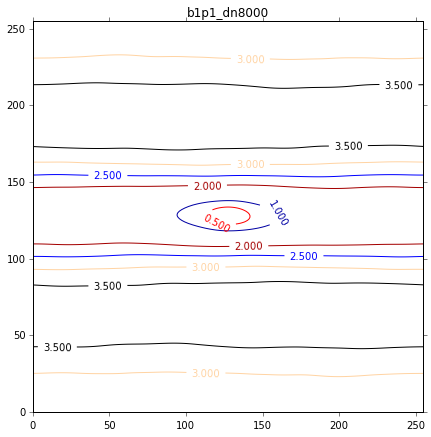

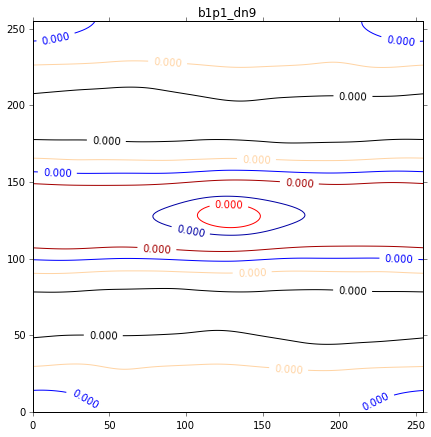

In [106]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# isotropy degree
#ratio of major and minor axis of contours
bvals = []
pvals = []
aves = []
stds = []

for file in infiles:
    hdu_list = fits.open(file)
    #print(hdu_list.info())
    cube = hdu_list[0].data
    hdu_list.close()

    filename1 = file[(file.find("/")+1):file.find("/con")]
    filename2 = file[(file.find("r_")+2):file.find("_J2")]
    filename = filename1+"_"+filename2

    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'

    plt.figure()
    CS = plt.contour(cube)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('{0}'.format(filename))
    #plt.show()
    completeName = os.path.abspath('/Users/mmcintosh/velocity_anisotropy/figures/contour_{0}.jpg'.format(filename))
    #savefig(completeName, bbox_inches='tight')


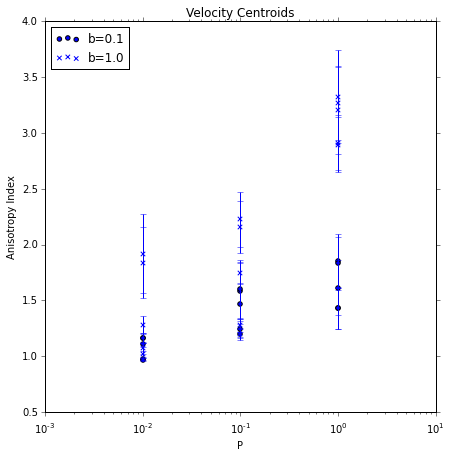

In [172]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# isotropy degree
#ratio of major and minor axis of contours
bvals = []
pvals = []
aves = []
stds = []

for file in infiles:
    hdu_list = fits.open(file)
    #print(hdu_list.info())
    cube = hdu_list[0].data
    hdu_list.close()

    filename1 = file[(file.find("/")+1):file.find("/con")]
    filename2 = file[(file.find("r_")+2):file.find("_J2")]
    filename = filename1+"_"+filename2

    #print(file)
    sz=np.shape(cube)[0]
    SF2 = cube
    SFy=SF2[sz/2:,sz/2] 
    SFz=SF2[sz/2,sz/2:]
    # average bw 10 and 100
    ave = mean((SFy/SFz)[10:100])
    aves.append(ave)
    sdv = std((SFy/SFz)[10:100])
    stds.append(sdv)
    b = filename[(filename.find("b")+1):filename.find("p")]
    bvals.append(float(b))
    p = filename[(filename.find("p")+1):filename.find("_")]
    pvals.append(float(p))

marker_mapping = {0.1 : 'o', 1.0: 'x', 0.01: '+'}
label_mapping = {0.1 : 'b=0.1', 1.0: 'b=1.0', 0.01: 'b=0.01'}

fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
x= None
for i in range(len(aves)):

    if x==label_mapping[bvals[i]]:
        label = None
    if x!=label_mapping[bvals[i]]:
        label = label_mapping[bvals[i]]
        x = label
    
        
    plt.scatter(pvals[i], aves[i], marker=marker_mapping[bvals[i]], label=label)

    
plt.errorbar(pvals, aves, yerr=stds, fmt=None)
plt.xlabel("P")
plt.ylabel("Anisotropy Index")
plt.title("Velocity Centroids")

#ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc=2)
#plt.show()
completeName = os.path.abspath('/Users/mmcintosh/velocity_anisotropy/figures/velocity_centroids.jpg')
savefig(completeName, bbox_inches='tight', dpi=300)


b.1p.1_centroid.fits
b.1p1_centroid.fits
b1p.01_centroid.fits
b1p.1_centroid.fits
b1p1_centroid.fits
moment1/moment1_ab-5_J2-1.fits
moment1/moment1_ab-8_J2-1.fits
moment1/moment1_dn275_J2-1.fits
moment1/moment1_dn8000_J2-1.fits
moment1/moment1_dn9_J2-1.fits


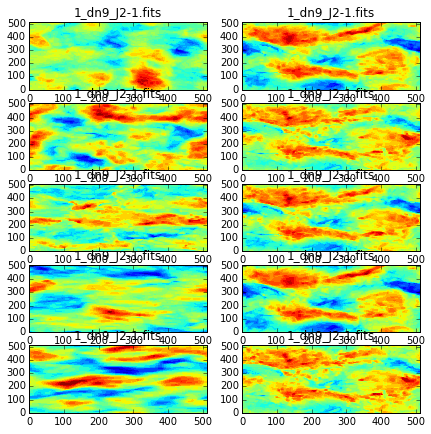

In [74]:
# Okay, I process the data in IDL, now I'm plotting it in python
# compare radiatve transfer ( i have) with particular density and abundance with non radiative transfer

#non radiative transfer
infiles = glob.glob('*cent*.fits')
# radiative transfer
files2 = glob.glob('moment1/*.fits')

def gridplot(files, nrows, ncol):
    fig, axes = plt.subplots(nrows, ncol)
    i = 0
    for col in arange(0,ncol):
        r=0
        for row in axes:
            #print("col:",col, "row:", r, "file",i)
            if i < len(files):
                print(files[i])
                hdu_list = fits.open(files[i])
                cube = hdu_list[0].data
                hdu_list.close()
                plot(row, col, cube, file)
            else:
                break
            i+=1    
            r+=1 

def plot(axrow, col, cube, file):
    L1 = axrow[col].contourf(cube,30, interpolation='nearest')
    axrow[col].set_title("{0}".format(file[10:]))
    #cb = axrow[0].figure.colorbar(L1)

files = infiles+files2
gridplot(files, 5,2)

def mirror(cube):
    field = cube
    sizefield=np.ndim(field)
    print(sizefield)
    n1 = len(field[0]) # must be integers
    print("n1",n1)
    n2 = 1
    n3 = 1
    if sizefield >= 2: 
        n2=len(field[1])
        print("n2", n2)
    if sizefield >= 3:
        n3 = len(field[2])
        print("n3", n3)
    if sizefield >= 4:
        raise TypeError("No more than 3 dimensions")
    nyq1 = n1/2
    nyq1_1 = nyq1 - 1
    nyq2 = n2/2
    nyq2_1 = nyq2 - 1
    nyq3 = n3/2
    nyq3_1 = nyq3 - 1


    for i2 in np.arange(0, n2-1):
        i2k=i2
        if i2 > nyq2:
            i2k = n2 - i2
        for i1 in np.arange(0, n1-1):
            i1k = i1
            if i1 > nyq1:
                i1k = n1 -i1
            cube[i1,i2]=cube[i1k,i2k]

                    # one sim. to 5 images

In [ ]:
#Isotropy degree

In [13]:
print(files2)

['moment1/moment1_ab-5_J2-1.fits', 'moment1/moment1_ab-8_J2-1.fits', 'moment1/moment1_dn275_J2-1.fits', 'moment1/moment1_dn8000_J2-1.fits', 'moment1/moment1_dn9_J2-1.fits']


2
n1 512
n2 512
fftfield (512, 512) [[-24.66989348 +0.j          14.50464858+10.56833546j
   -9.92882499 +4.24221828j ...,  -1.78900159 -0.39796482j
   -9.92882499 -4.24221828j  14.50464858-10.56833546j]
 [-19.31554335 +0.j          14.47430260+10.62929673j
   -9.88099286 +4.37827177j ...,  -1.97388854 -0.42877189j
   -9.88099286 -4.37827177j  14.47430260-10.62929673j]
 [-19.22231199 +0.j          14.38753553+10.72495436j
   -9.81369874 +4.46722734j ...,  -2.05525923 -0.43088541j
   -9.81369874 -4.46722734j  14.38753553-10.72495436j]
 ..., 
 [-16.27947864 +0.j          14.09572051 +9.92611027j
   -9.77871423 +3.38299429j ...,  -0.29834620 +0.12660751j
   -9.77871423 -3.38299429j  14.09572051 -9.92611027j]
 [-16.68544591 +0.j          14.28835250+10.27081226j
   -9.91748484 +3.69652138j ...,  -0.88266931 -0.10885144j
   -9.91748484 -3.69652138j  14.28835250-10.27081226j]
 [-17.20246932 +0.j          14.43049978+10.47185982j
   -9.97125534 +3.99838691j ...,  -1.40528815 -0.27934827j
   -

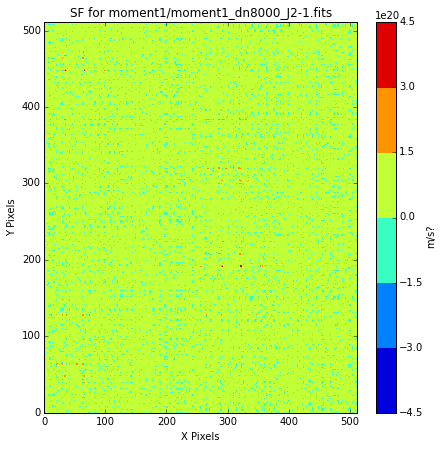

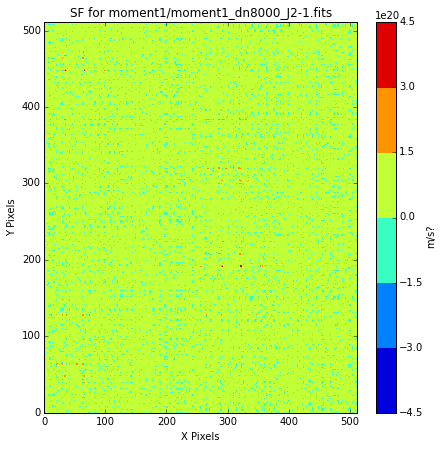

[[ -1.05236609e+07 +0.00000000e+00j  -9.20436204e+07 -6.39144598e+06j
   -3.10004556e+07 +8.39923549e+06j ...,  -2.67117436e-04 +6.10094003e-02j
   -4.57269780e-03 +3.15299268e-02j   7.70701380e-03 +1.00611830e-02j]
 [ -4.57863628e+17 +0.00000000e+00j  -3.98153595e+18 +1.05442965e+18j
   -3.13499043e+18 +1.10078109e+17j ...,   1.53533046e+12 -1.29890864e+12j
   -4.23786150e+11 +5.23244232e+11j   2.45828701e+11 +1.21732759e+12j]
 [ -1.59171008e+18 +0.00000000e+00j  -2.36852485e+18 -3.14453388e+18j
    2.18956944e+18 +1.33951769e+17j ...,  -7.74794936e+11 +4.41774735e+11j
   -8.81581216e+11 -1.67000649e+10j  -2.77218339e+11 +1.09790170e+12j]
 ..., 
 [ -3.38099037e+18 +0.00000000e+00j   2.27497737e+18 -3.23691471e+18j
   -1.41950099e+18 -2.89730136e+18j ...,   8.22728347e+12 -4.48049176e+12j
    4.08295621e+12 +1.93857821e+12j   2.95273821e+12 +3.58240239e+12j]
 [  1.59171008e+18 +0.00000000e+00j   2.36852485e+18 +3.14453388e+18j
   -2.18956944e+18 -1.33951769e+17j ...,   7.74794936e+11 -

In [15]:
#IDL Structure function code translated to Python

#fake data
files2 = glob.glob('moment1/*.fits')
file = files2[3]
hdu_list = fits.open(file)
cube = hdu_list[0].data
hdu_list.close()
field = np.asarray(cube.astype(float))
no_fluct = None
mirror = None
const = None
d=1


def sf_fft(field, no_fluct, mirror, const):
    sizefield=np.ndim(field)
    print(sizefield)
    n1 = len(field[0]) # must be integers
    print("n1",n1)
    n2 = 1
    n3 = 1
    if sizefield >= 2: 
        n2=len(field[1])
        print("n2", n2)
    if sizefield >= 3:
        n3 = len(field[2])
        print("n3", n3)
    if sizefield >= 4:
        raise TypeError("No more than 3 dimensions")
    
    if no_fluct == None:
        field1 = field - np.mean(field)
    else:
        field1 = field
    
    fftfield = np.fft.fft(field1)
    print("fftfield", np.shape(fftfield), fftfield)
    ps = fftfield*np.conjugate(fftfield)
    print("ps",np.shape(ps), ps, type(ps[0][0]))
    acf = np.fft.fft(np.linalg.inv(ps))
    print ("acf", np.shape(acf), acf)
    sf = 2*np.var(field1) - 2*acf
    return(sf)

def mirror(sf):
    SF2 = sf
    sz = len(sf[0])
    SF2[0:sz/2-1,0:sz/2-1]=sf[sz/2:sz-1,sz/2:sz-1]
    SF2[sz/2:sz-1,0:sz/2-1]=sf[0:sz/2-1,sz/2:sz-1]
    SF2[0:sz/2-1,sz/2:sz-1]=sf[sz/2:sz-1,0:sz/2-1]
    SF2[sz/2:sz-1,sz/2:sz-1]=sf[0:sz/2-1,0:sz/2-1]
    return(SF2)
        

test = sf_fft(field, no_fluct, mirror, const)
test2 = mirror(test)

# Plotting
fig = plt.figure()
ax111 = fig.add_subplot(111)
L1 = ax111.contourf(test, interpolation='nearest')
cb = ax111.figure.colorbar(L1)
cb.set_label('m/s?', y=0.45)

# labels
ax111.set_xlabel("X Pixels")
ax111.set_ylabel("Y Pixels") 
ax111.set_title("SF for {0}".format(file))
plt.show()


# Plotting
fig = plt.figure()
ax111 = fig.add_subplot(111)
L1 = ax111.contourf(test2, interpolation='nearest')
cb = ax111.figure.colorbar(L1)
cb.set_label('m/s?', y=0.45)

# labels
ax111.set_xlabel("X Pixels")
ax111.set_ylabel("Y Pixels") 
ax111.set_title("SF for {0}".format(file))
plt.show()


print(test)

In [ ]:
sizefield=np.ndim(field)
print(sizefield)
n1 = sizefield # must be integers
print("n1",n1)
n2 = 1
n3 = 1
if sizefield >= 2: 
    n2=sizefield
    print("n2", n2)
if sizefield >= 3:
    n3 = sizefield
    print("n3", n3)
if sizefield >= 4:
    raise TypeError("No more than 3 dimensions")

if no_fluct != None:
    field1 = field - np.mean(field/field.astype(float))
else:
    field1 = field

fftfield = np.fft.fft(field1)
print("fftfield", fftfield)
ps = fftfield*np.conjugate(fftfield)
print("ps",ps)
acf = np.fft.fft(ps/np.linalg.inv(ps))
print ("acf", acf)


if mirror != None:
    # produce mirror images
    nyq1 = n1/2
    nyq1_1 = nyq1 - 1
    nyq2 = n2/2
    nyq2_1 = nyq2 - 1
    nyq3 = n3/2
    nyq3_1 = nyq3 - 1

    for i3 in np.arange(0,n3-1):
        i3k = i3
        if i3 > nyq3:
            i3k= n3 - i3
        for i2 in np.arange(0, n2-1):
            if i2 > nyq2:
                i2k = n2 - i2
            for i1 in np.arange(0, n1-1):
                i1k = i1
                if i1 > nyq1:
                    i1k = n1 -i1
                    acf[i1,i2,i3]=acf[i1k,i2k,i3k]
    #2d stuff d = 1                
    if no_fluct != None:
        sf = 2*d*np.nanmean(field1**(2)-acf)
    else:
        sf = 2*d*np.nanvar((field1 - acf),0)


    print("done")

    if const != None:
        acf = (acf-np.nanmin(acf))
        sf = 2*d*((np.nanmax(acf)-acf))
print(np.shape(sf))

# Plotting
    fig = plt.figure()
    ax111 = fig.add_subplot(111)
    L1 = ax111.contourf(cube,30, interpolation='nearest')
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s?', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Integrated Map for {0}".format(file))
    plt.show()



In [ ]:
    #2d stuff d = 1   
    if no_fluct != None:
        sf = 2*d*(np.nanmean(field1**(2*d))-acf)
    else:
        sf = 2*d*(np.nanvar(field1) - acf)

    if const != None:
        acf = (acf-np.nanmin(acf))
        sf = 2*d*((np.nanmax(acf)-acf))

    print("sf", np.shape(sf), type(sf))

In [ ]:
#IDL Structure function code

FUNCTION sf_fft, field, no_fluct = no_fluct, mirror = mirror, const=const

sizefield=size(field)

N1=sizefield(1)
N2=1
N3=1
if sizefield(0) ge 2 then N2=sizefield(2)
if sizefield(0) ge 3 then N3=sizefield(3)
if sizefield(0) ge 4 then begin
   printf, -2, 'Well, please no more than 3 dimensions !'
   stop
endif

if not( keyword_set(no_fluct) ) then field1=field-mean(field,/double) $
else field1=field

fftfield=fft(field1,/double)
ps=fftfield*conj(fftfield)
acf=double(fft(ps,/inverse))

if keyword_set( mirror ) then begin
;Let's do here the trick of producing the mirror images   
    nyq1=N1/2
    nyq1_1=nyq1-1
    nyq2=N2/2
    nyq2_1=nyq2-1
    nyq3=N3/2
    nyq3_1=nyq3-1
    
    for i3=0,N3-1 do begin
        i3k=i3
        if i3 gt nyq3 then i3k=N3-i3
        for i2=0,N2-1 do begin
            i2k=i2
            if i2 gt nyq2 then i2k=N2-i2
            for i1=0,N1-1 do begin
                i1k=i1
                if i1 gt nyq1 then i1k=N1-i1
                acf[i1,i2,i3]=acf[i1k,i2k,i3k]
            endfor
        endfor
    endfor
    
endif

if keyword_set(no_fluct) then sf=2d*(mean( field1^(2d) )-acf ) $
else sf=2d*(variance(field1)-acf)

if keyword_set(const) then begin
    acf=acf-min(acf)
    sf=2d*(max(acf)-acf)
endif

return,sf

end


In [13]:
i = 1
s = "11"
s+str(i)

TypeError: 'str' object is not callable